# E2a: Küchentischversuch zum Laval-Rotor

Name: Keanu Engel
Datum: 06.01.2024 

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit: Welche Frequenzen und Amplituden weisen Haushaltsgegenstände auf, die rotieren oder minimal in Bewegung sind? Gibt es große Unterschiede in der Höhe der Amplitude zwischen einem rotierenden Gerät und einem minimal beweglichem wie zum Beispiel einem Handy?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="figures/Versuch_cordless_screwdriver.jpg" width="800">

- Beschreibung des Aufbaus: Für diesen Versuchsaufbau wird ein Beschleunigungssensor an den Pi angeschlossen und an einen Akkuschrauber von Bosch mithilfe von Klebeband befestigt und anschließend wird dieser im Betrieb gemessen
- Vorgangsbeschreibung: Der Akkuschrauber liegt flach auf dem Tisch und wird kurz vor der Messung manuell gestartet und bleibt über die ganze Messung auf höchster Stufe im Betrieb. Nun wird die Messung gestartet und für 20 Sekunden laufen gelassen. Sobald die Messung abgeschlossen ist, wird der Akkuschrauber wieder ausgeschaltet.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = '/home/jovyan/work/lavalrotor_home_experiment/measurement_data' # replace None by the relative path to the first object's folder
h5_file_name = 'data_20240106_212222_KeanuEngel_cordless screwdriver' # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "/home/jovyan/work/lavalrotor_home_experiment/measurement_data/data_20240106_212222_KeanuEngel_cordless screwdriver/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "/home/jovyan/work/lavalrotor_home_experiment/measurement_data/data_20240106_212222_KeanuEngel_cordless screwdriver/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "/home/jovyan/work/lavalrotor_home_experiment/measurement_data/data_20240106_212222_KeanuEngel_cordless screwdriver/1ee847be-fddd-6

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
with h5py.File('/home/jovyan/work/lavalrotor_home_experiment/measurement_data/data_20240106_212222_KeanuEngel_cordless screwdriver/data_20240106_212222_KeanuEngel_cordless screwdriver.h5','r') as f:
    acceleration_x = np.array(f['RawData']['acceleration_x'])
    acceleration_y = np.array(f['RawData']['acceleration_y'])
    acceleration_z = np.array(f['RawData']['acceleration_z'])
    time = np.array(f['RawData']['timestamp'])

#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:
Betrag_acc = get_vec_accel(acceleration_x,acceleration_y,acceleration_z)
print(Betrag_acc)

[ 8.51768383  8.51768383  8.51768383 ... 27.60630327 27.60630327
 27.60630327]


#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


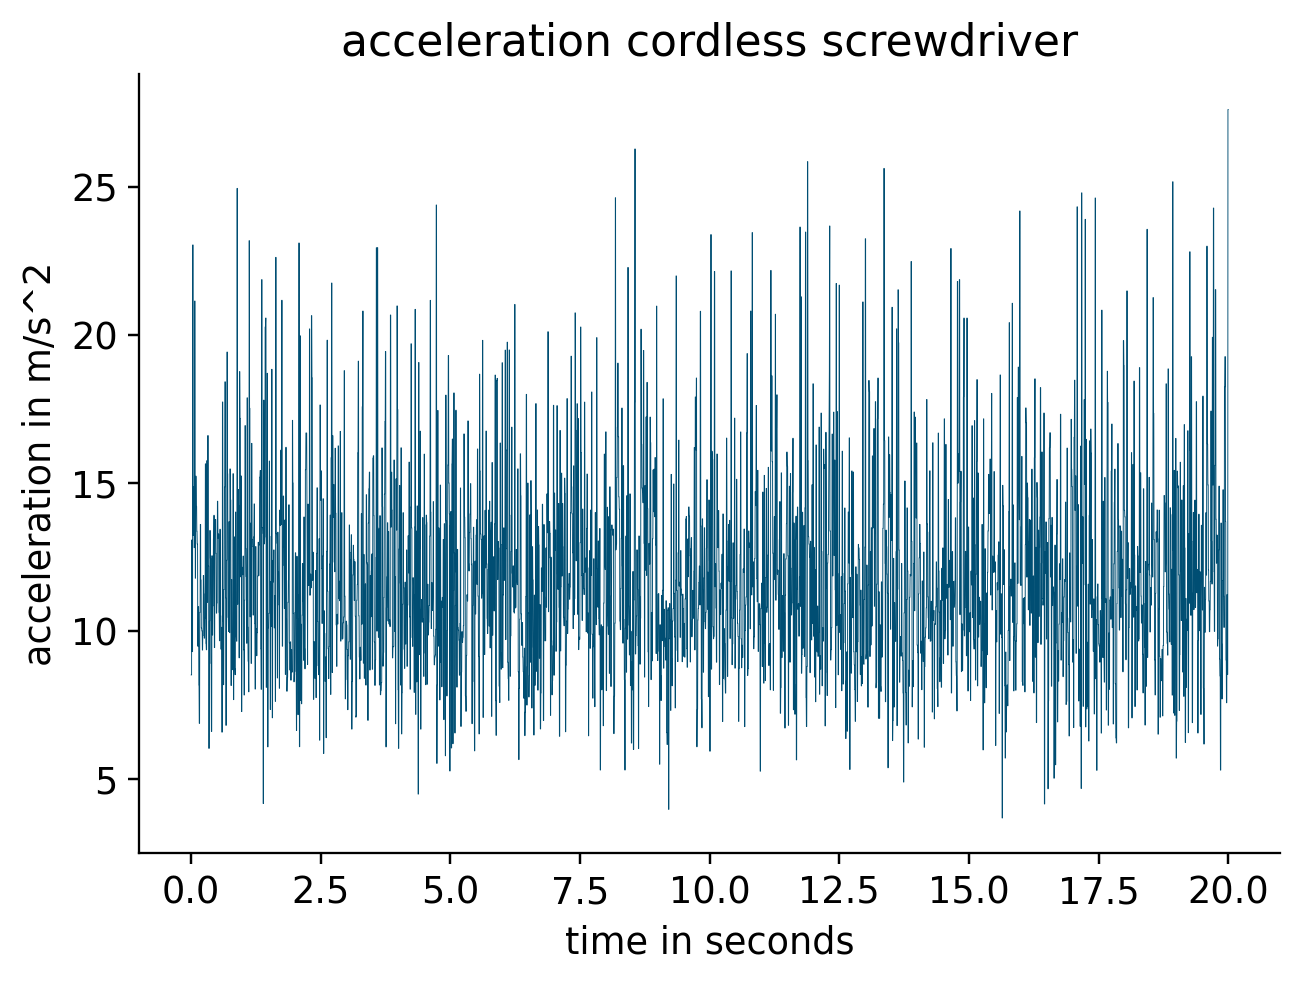

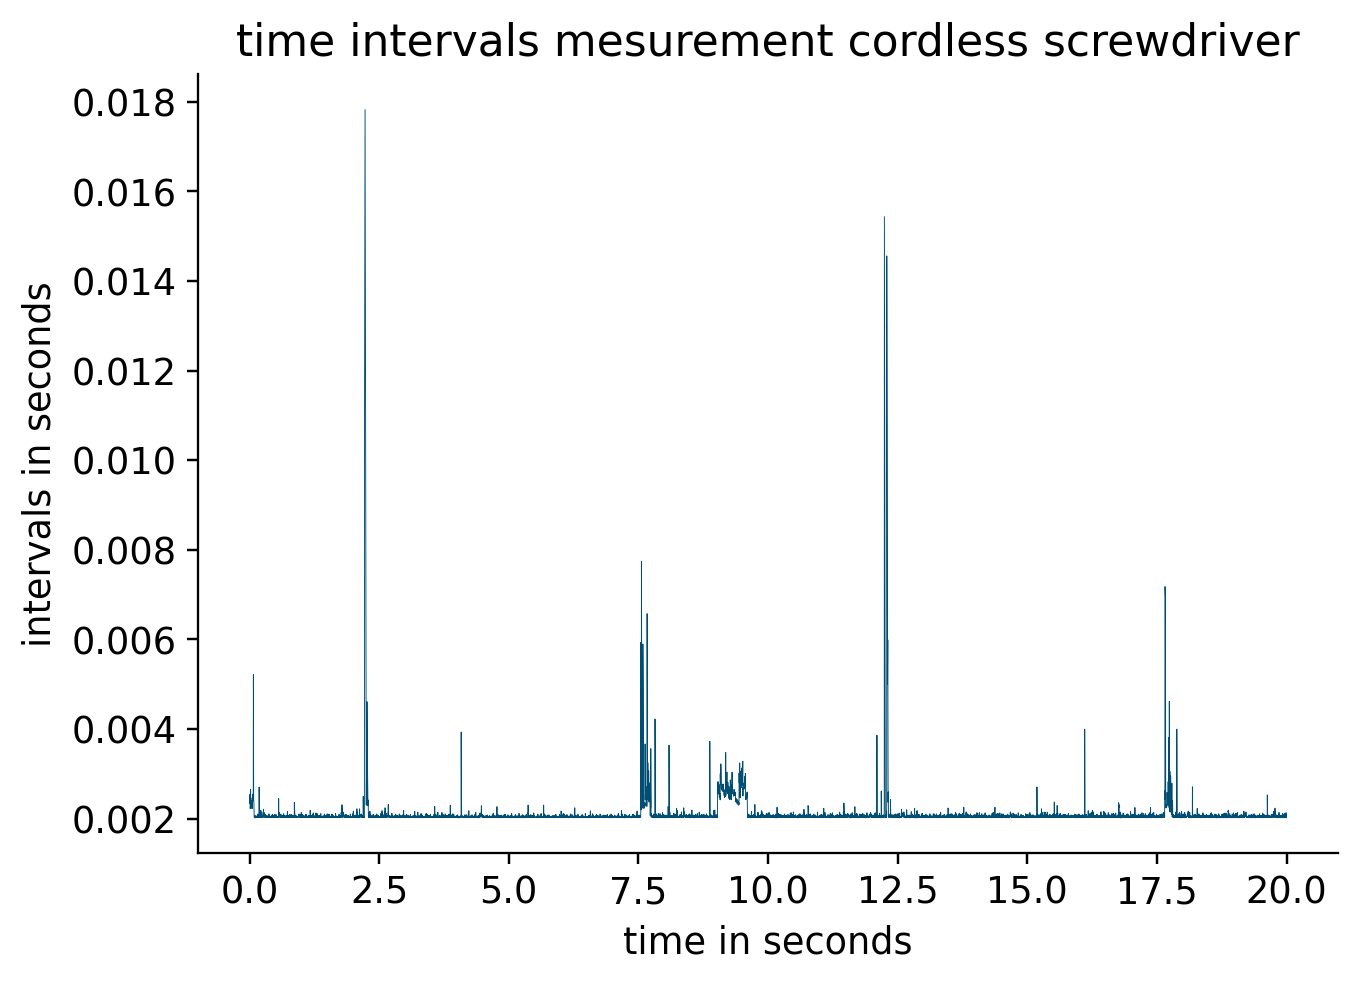

In [6]:
fig_1 = plt.figure()
plt.plot(time, Betrag_acc, linewidth=0.3)
plt.xlabel('time in seconds')
plt.ylabel('acceleration in m/s^2')
plt.title('acceleration cordless screwdriver')

time_intervals = []
for i in range(1, (len(time))):
    time_intervals.append(time[i]-time[i-1])

fig_2 = plt.figure()
plt.plot(time[:-1], time_intervals, linewidth=0.3)
plt.xlabel('time in seconds')
plt.ylabel('intervals in seconds')
plt.title('time intervals mesurement cordless screwdriver')
plt.show()

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [7]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration

(time_interpolation, data_interpolation) = interpolation(time, Betrag_acc)

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

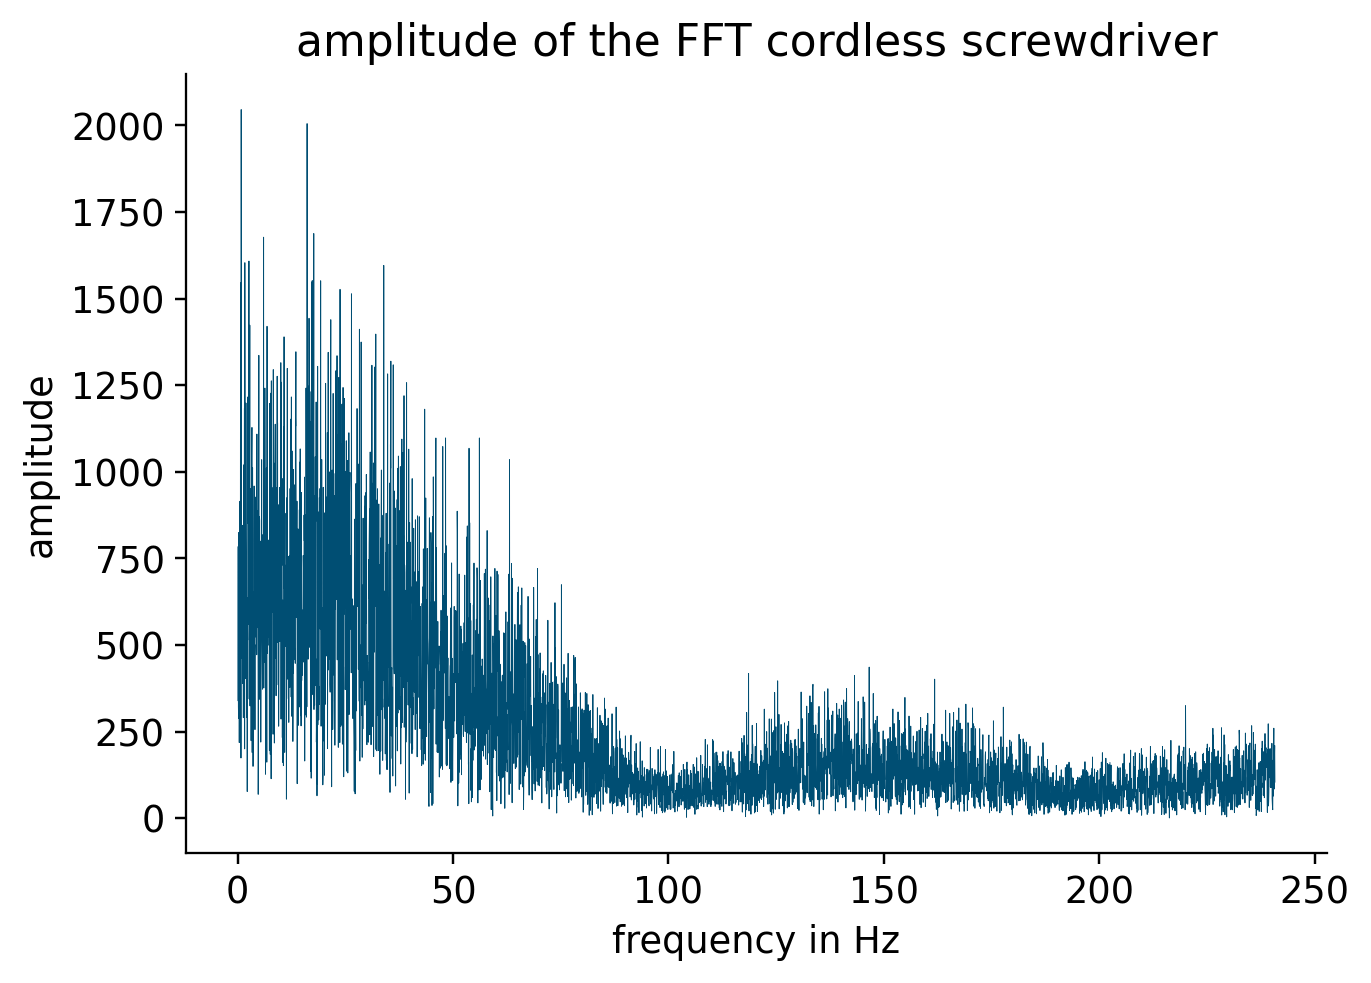

In [8]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.

amplitude_fft, frequencies = my_fft(Betrag_acc, time)

plt.plot(frequencies[1:], amplitude_fft[1:], linewidth=0.3)
plt.title('amplitude of the FFT cordless screwdriver')
plt.xlabel('frequency in Hz')
plt.ylabel('amplitude')
plt.show()

#sp = np.fft.fft(np.sin(time))
#freq = np.fft.fftfreq(time.shape[-1])
#plt.plot(freq, sp.real, freq, sp.imag)
#plt.plot(time_interpolation, data_interpolation)
#plt.show()
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="figures/Versuch_mobile_phone.jpg" width="800">

- Beschreibung des Aufbaus: Für diesen Versuchsaufbau wird ein Beschleunigungssensor an den Pi angeschlossen, an ein Handy geklebt und anschließend während einem Alarmton gemessen
- Vorgangsbeschreibung: Das Handy liegt flach auf dem Tisch und der Timer wird kurz vor der Messung gestartet. Nun wird die Messung gestartet und für 20 Sekunden laufen gelassen. Sobald die Messung abgeschlossen ist, wird der Timer gestoppt.

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [9]:
path_measurement_folder = '/home/jovyan/work/lavalrotor_home_experiment/measurement_data' # rgiteplace None by the relative path to the first object's folder
h5_file_name = 'data_20240106_211358_KeanuEngel_mobile phone' # replace None by the filename of the hdf5-file

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [10]:
with h5py.File('/home/jovyan/work/lavalrotor_home_experiment/measurement_data/data_20240106_211358_KeanuEngel_mobile phone/data_20240106_211358_KeanuEngel_mobile phone.h5','r') as f:
    acceleration_x = np.array(f['RawData']['acceleration_x'])
    acceleration_y = np.array(f['RawData']['acceleration_y'])
    acceleration_z = np.array(f['RawData']['acceleration_z'])
    time = np.array(f['RawData']['timestamp'])

#### 2. Betrag der Beschleunigung berechnen


In [11]:
Betrag_acc = get_vec_accel(acceleration_x,acceleration_y,acceleration_z)
print(Betrag_acc)

[10.22227434 10.19272839 10.19272839 ... 10.18041746 10.18041746
 10.18041746]


#### 3. Darstellung der Messdaten

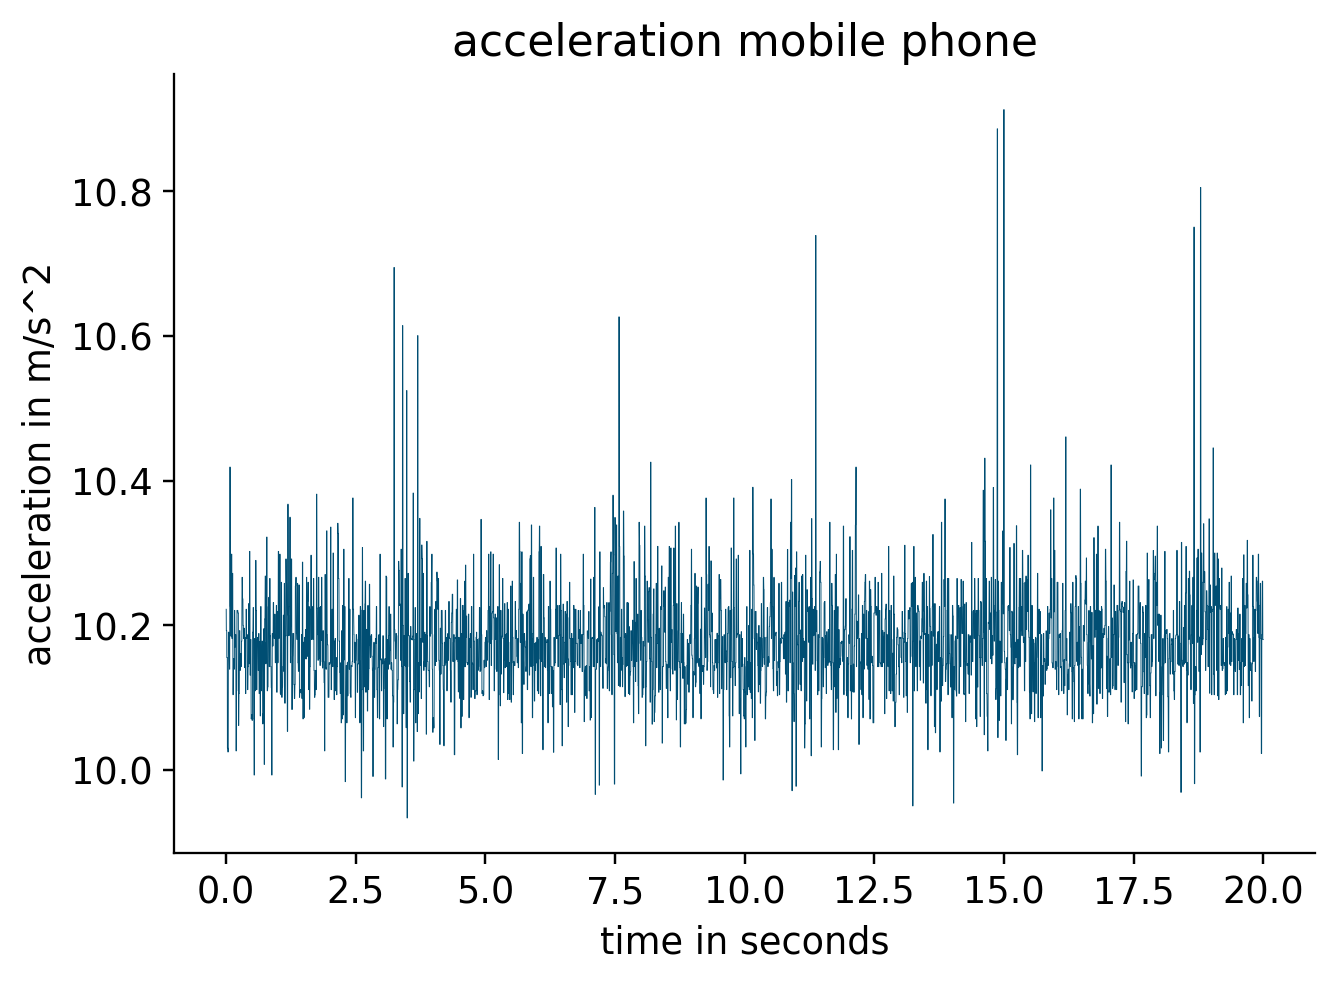

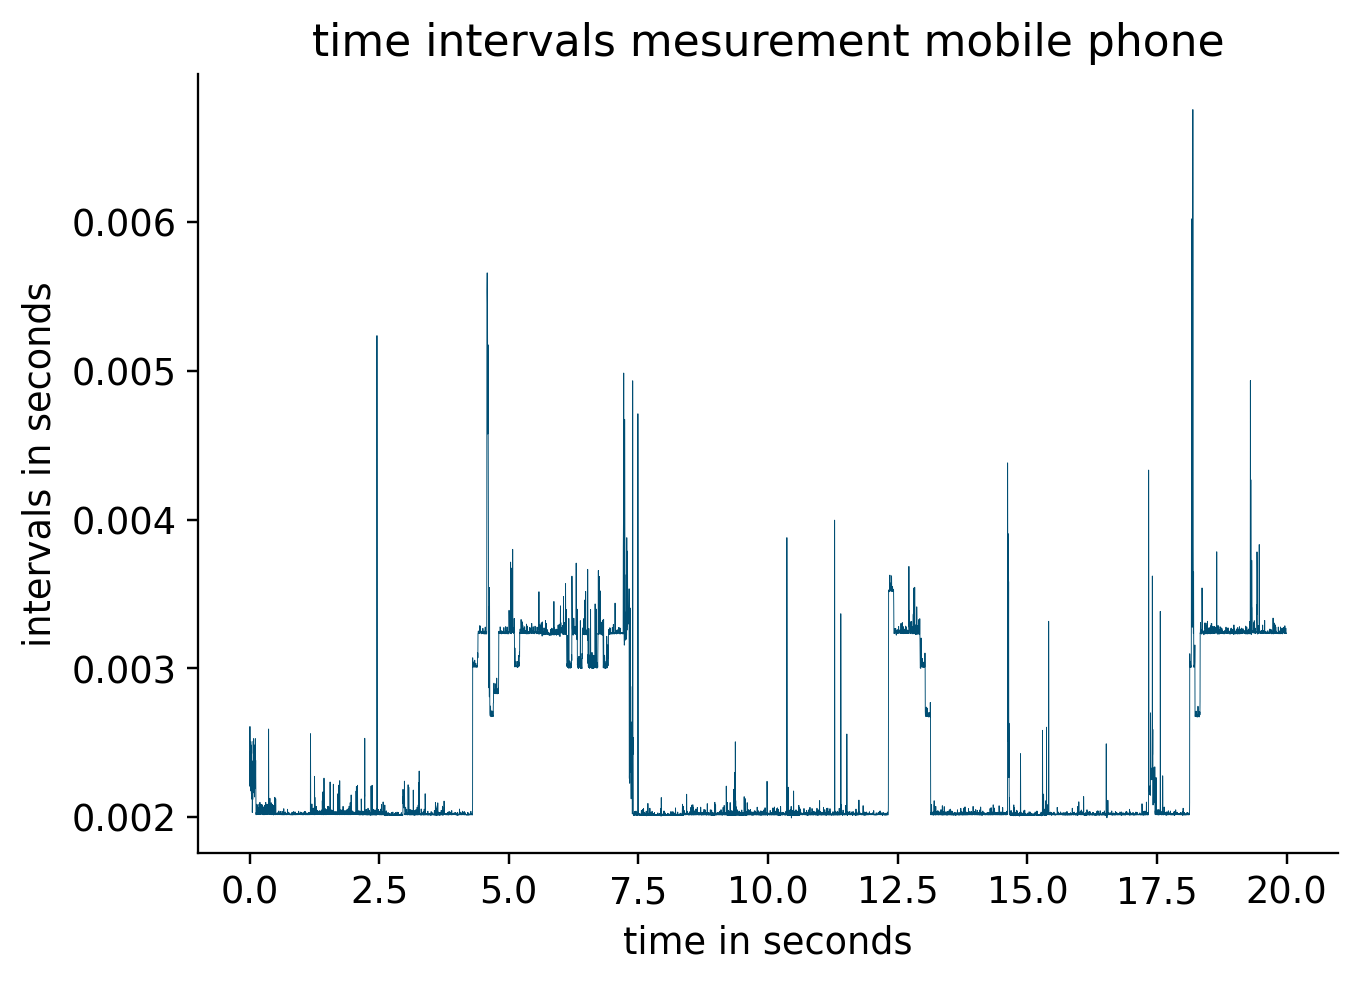

In [12]:
fig_1 = plt.figure()
plt.plot(time, Betrag_acc, linewidth=0.3)
plt.xlabel('time in seconds')
plt.ylabel('acceleration in m/s^2')
plt.title('acceleration mobile phone')

time_intervals = []
for i in range(1, (len(time))):
    time_intervals.append(time[i]-time[i-1])

fig_2 = plt.figure()
plt.plot(time[:-1], time_intervals, linewidth=0.3)
plt.xlabel('time in seconds')
plt.ylabel('intervals in seconds')
plt.title('time intervals mesurement mobile phone')
plt.show()

#### 4. Interpolation der Messwerte



In [13]:
(time_interpolation, data_interpolation) = interpolation(time, Betrag_acc)

#### 5 & 6. FFT durchführen und graphisch darstellen


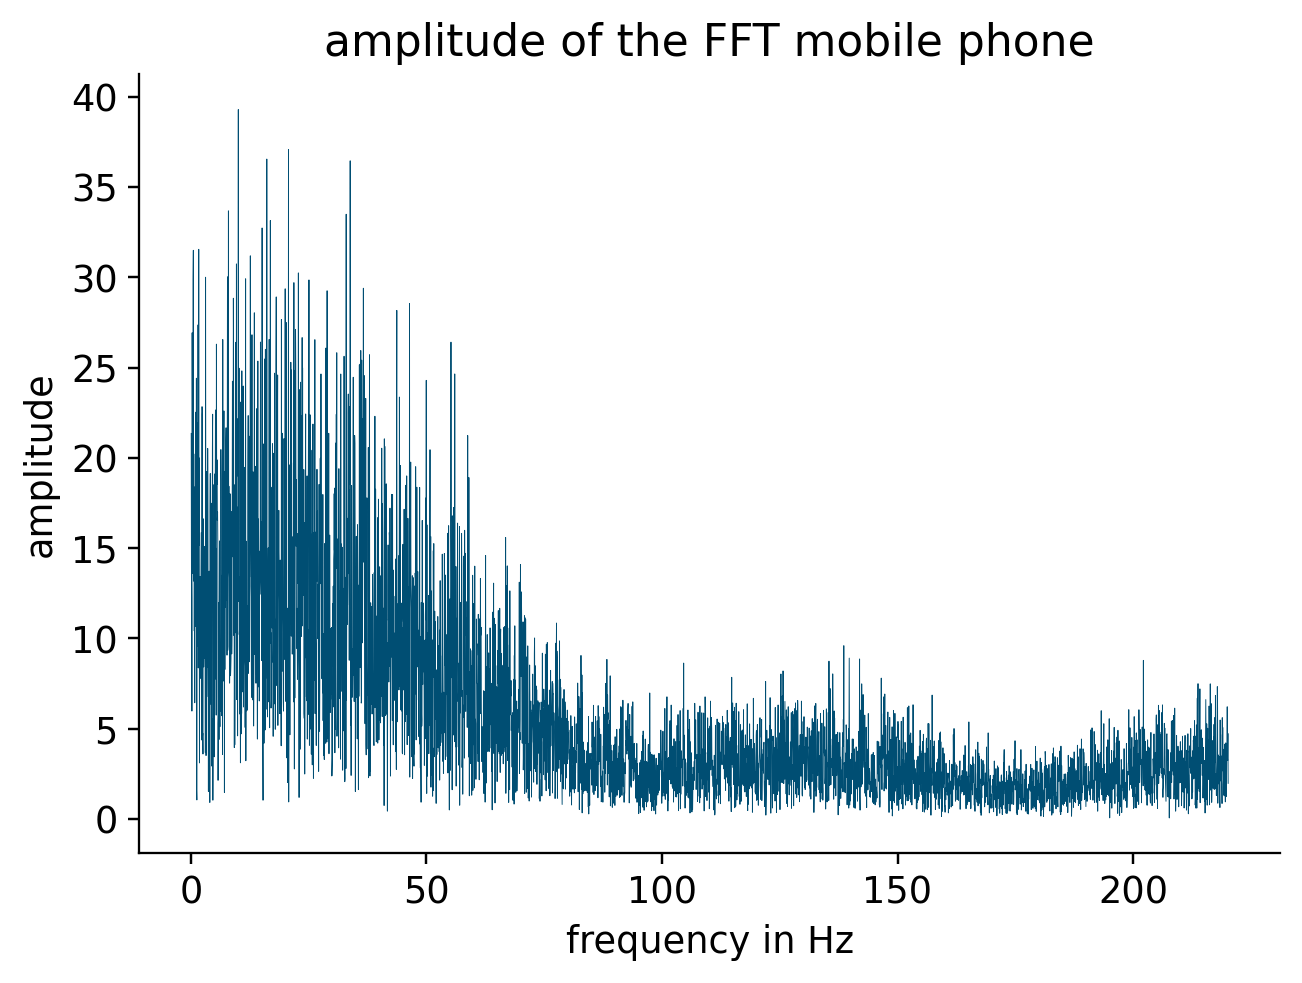

In [14]:
amplitude_fft, frequencies = my_fft(Betrag_acc, time)

plt.plot(frequencies[1:], amplitude_fft[1:], linewidth=0.3)
plt.title('amplitude of the FFT mobile phone')
plt.xlabel('frequency in Hz')
plt.ylabel('amplitude')
plt.show()

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Anhand der Messergebnisse ist zu erkennen, dass beide Haushaltsgeräte ähnliche Muster in dem Frequenzbereich und der Form der Amplitude aufweisen. Es ist aber auch klar zu erkennen, dass der Akkuschrauber, der eine rotierende Komponente enthält eine viel höhere Amplitude mit maximal 2000 aufweist, als das Handy, welches nur minimale Bewegungen durchführt und daher eine kleinere Amplitude von maximal 40 zeigt. Dies lässt darauf schließen, dass der Akkuschrauber stärkere Vibrationen beim Betrieb erzeugt als das Handy.Es ist auch sehr interessant zu sehen, dass beide Geräte ungefähr die gleiche Amplituden Form bei ungefähr den selben Frequenzen haben.
Zudem schwanken die Beschleunigungen bei dem Akkuschrauber deutlich stärker als bei dem Handy, bei dem diese relativ konstant bei dem Wert 10.2 m/s^2 bleiben und es jeweils in rhythmischen Abständen zu Maximas und Ausschägen kommt aufgrund des rhythmischen Signaltons des Timers.
Außerdem ist an beiden Graphen, die die zeitlichen Abstände zwischen den Messpunkten darstellen zu erkennen, dass es bei den Messintervallen manchmal größere Abweichungen gab, was auf den PI zurückzuführen ist.
Für die graphische Darstellung des Frequenzbereichs musste die Frequenz bei 0 Hz rausgefiltert werden, da die Messergebnisse sonst nicht das volle Frequenzspektrum zeigen würden.
Bei dem Versuchsaufbau ist auch zu erkennen, dass mein laufender Laptop mit auf dem Versuchstisch lag, was ebenfalls auch zu Messverzerrungen führen könnte und eventuell auch verantwortlich für die ähnlichen Ausschläge bei den selben Frequenzen sein könnte, wovon ich aber nicht ausgehe.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

In diesem Versuch konnte ich lernen, wie man mithilfe von einem Beschleunigungssensor die Frequenzen von Geräten messen kann und somit vergleichen kann anhand der Amplitude, wie stark sich diese bewegen bzw. vibrieren/schwingen. Bei meinem Versuch ist mir aufgefallen, dass die Amplitude des Akkuschraubers relativ hoch war, weshalb ich den Versuch noch einmal ausgeführt habe, was aber zu den selben Ergebnissen geführt hat, mit denen ich dann auch die Auswertung gestartet habe. Zudem war es auch noch gut mal eine Fouriertransformation in der Praxis durchzuführen, was mir im weiteren Verlauf des Studiums weiterhelfen kann. Außerdem  konnte ich noch mehr Erfahrung mit der Verwendung von des Pi's, sowie Jupyter und Git sammeln.